In [19]:
import pickle
import sys
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from scipy.spatial import distance
sys.path.insert(0, './../preprocessing')

import session as ss

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def cosine_sim(a, b):
    return b.apply(lambda x: distance.cosine(a,x), axis=1)

def topK(K,centroid,data,similarity_measure=euclidean_distance):
    df = data.copy()
    df['distance'] = similarity_measure(centroid, data.loc[:, data.columns != 'label'])#np.linalg.norm(centroid - data.loc[:, data.columns != 'label'], axis=1) 
    df = df.sort_values(by=['distance'])
    return df.head(K)

embedding_size = 100
embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % embedding_size, sep='\t', header=None, dtype=float)
labels = pd.read_csv('word2vec_preprocessed_embeddings/labels_%d.csv' % embedding_size, sep='\t', header=None, dtype=str)

kmeans = KMeans(n_clusters=10).fit(embeddings)

centroids = kmeans.cluster_centers_

embeddings['label'] = labels
df = embeddings.copy()

for i, c in enumerate(centroids):
    top10 = topK(K=10, centroid=c, data=embeddings, similarity_measure=euclidean_distance)
    df['c%d' % i] = df.index.isin(top10.index)
    print('cluster %d' % i)
    print(top10['label'])
    print()


cluster 0
167               click_on_add_post_code
41                          submit_order
93                 click_on_use_existing
90                 click_on_no_data_incl
210                    click_on_feedback
40                          activate_new
209                  click_on_mobile_sub
205    click_on_did_you_notice_new_login
202                      click_on_remove
91               click_on_surf_datapakke
Name: label, dtype: object

cluster 1
210                    click_on_feedback
209                  click_on_mobile_sub
203              click_on_personal_users
205    click_on_did_you_notice_new_login
123                click_on_installed_in
204     order_overview_check_locked_subs
207                       go_back_to_top
48                    click_on_last_used
201                      click_on_filter
181              click_on_menu_sim_cards
Name: label, dtype: object

cluster 2
209                  click_on_mobile_sub
210                    click_on_feedback
13          

In [2]:
for i, c in enumerate(centroids):
    top10 = topK(K=10, centroid=c, data=embeddings, similarity_measure=cosine_sim)
    print('cluster %d' % i)
    print(top10['label'])
    print()

cluster 0
65         explore_additional_services
126                    click_on_fusion
154    click_whether_you_can_get_fiber
56                  GDPR_related_click
120                      click_on_APIs
77                    click_on_telenor
140      click_on_terms_and_conditions
133                click_on_magic_link
100           click_on_recommendations
72                      click_on_inbox
Name: label, dtype: object

cluster 1
74               click_on_change_account
83           click_on_menu_subscriptions
8                   open_invoice_account
75     click_on_change_account_reference
13                         click_on_name
107                      export_to_excel
138                       click_on_trash
170              scroll_on_accounts_page
20                empty_subselect_ignore
47                click_on_menu_accounts
Name: label, dtype: object

cluster 2
4       order_overview_check_completed_orders
71                            click_on_expand
131           order_ov

In [20]:
import matplotlib.pyplot as plt

def plot_clusters(emb,c):
    plt.scatter(x=emb['x'], y=emb['y'])
    plt.scatter(x=c['x'], y=c['y'], marker='x')
    plt.show()

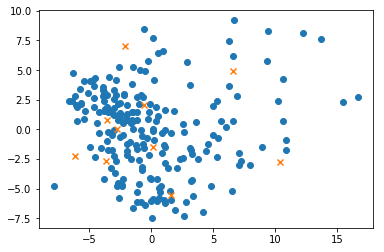

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = df.loc[:, df.columns[0:100]]
pc = pca.fit_transform(data)
pc = pd.DataFrame(data = pc, columns = ['x', 'y'])

pcc = pca.fit_transform(centroids)
pcc = pd.DataFrame(data = pcc, columns = ['x', 'y'])

plot_clusters(pc,pcc)

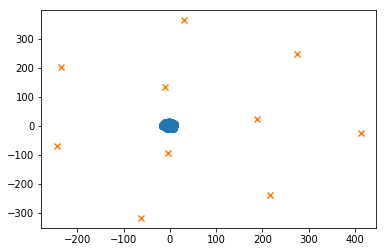

In [24]:
from sklearn.manifold import TSNE

data = df.loc[:, df.columns[0:100]]
tsne_data = TSNE(n_components=2).fit_transform(data)
tsne_data = pd.DataFrame(data = tsne_data, columns = ['x', 'y'])

tsne_c = TSNE(n_components=2).fit_transform(centroids)
tsne_c = pd.DataFrame(data = tsne_c, columns = ['x', 'y'])

plot_clusters(tsne_data, tsne_c)